In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [3]:
T = 1000
# Generate synthetic data
x, y, z = sample(model, T)


([-0.005774135480555194 0.0020675904922135436 … 0.032159415587346474 0.05372887375999916; -0.017762773388346566 0.054760456040334735 … -0.10696223889695364 -0.09699464732560406], [-0.008165093772717243 0.045631950197704704 … -0.050323491624458885 -0.014473504581514515; 0.01744928312424765 -0.02060159033120583 … 0.0675583423786563 0.00388597355675159; … ; 0.005329651249859693 0.1451787980075594 … 0.03213684839745746 -0.03051328424403746; -0.029226275954721277 -0.024055213658275062 … -0.08508079724902803 -0.016188887912414893], [2, 2, 2, 2, 2, 2, 2, 2, 2, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

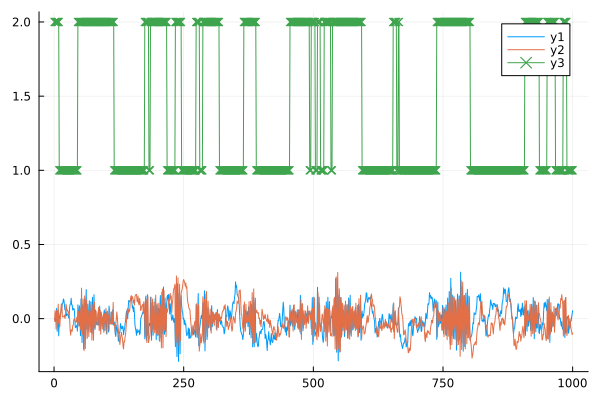

In [4]:
plot(x')
plot!(z, marker=:x)

In [5]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.7 0.3; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.001 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.001 * I(d))

# set up the observation parameters
C = randn(p, d)
R = Matrix(0.001 * I(p))

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6)) for (i,f) in zip(1:K, [0.7, 0.1])]

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.7 0.3; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.726600077920264 -0.6120068028758064; 0.6120068028758064 0.726600077920264], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([1.0548426197090242 -0.5314211023224301; -0.6474332415107721 0.1271760215776717; … ; -0.6187600545042322 0.04491788725458301; 0.75661587672164 0.16538516227614086], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.094

In [6]:
FB = StateSpaceDynamics.initialize_forward_backward(modeli, T)
FS = [StateSpaceDynamics.initialize_FilterSmooth(modeli.B[k], T) for k in 1:K]

ml, mls = variational_expectation!(modeli, y, FB, FS)  

(-224.40520479964462, Any[-693.147180559932, -586.2669470868931, -259.3651164877827, -224.47770612927866, -224.40297940271265, -224.38893309249045, -224.3949642559821, -224.40109879499033, -224.40435458251625, -224.40510035783166, -224.4051925302336, -224.40520330785208, -224.4052046342938, -224.40520479964462])

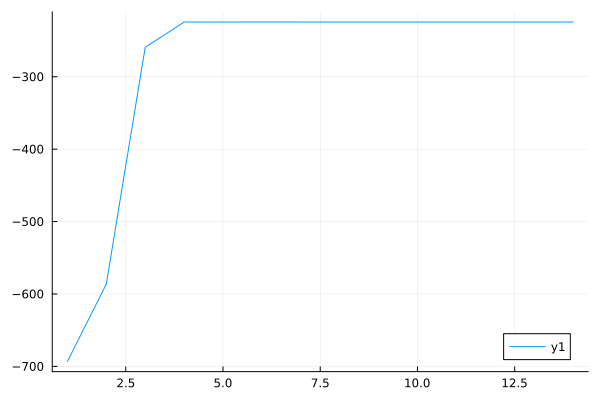

In [7]:
plot(mls)

In [8]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=100)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:01:00 ( 0.60  s/it)


([-279.07993401857016, -116.68077286779828, -116.7126786062375, -116.72006290490415, -116.79202512172085, -116.92400764136589, -117.11228953632073, -117.36801381890965, -117.65459769521972, -117.90545815102459  …  -114.18287288112784, -114.18306372874784, -114.18324876069302, -114.18342823857674, -114.18360240858146, -114.18377150254318, -114.18393573899411, -114.18409532410269, -114.18425045253005, -114.18440130823477], [19.543802446957898, 2.7626374174238975, 0.6044612184778906, 0.39781329972255536, 0.3099687590481142, 0.2519384796010995, 0.20139129665407543, 0.16570648586987638, 0.145116059483568, 0.1339464011585612  …  2.0333069847565787e-5, 1.8921518432436738e-5, 1.7688813520328865e-5, 1.661198218432774e-5, 1.567065159657785e-5, 1.484680526608844e-5, 1.4124567514663299e-5, 1.3490007337783726e-5, 1.2930955517373185e-5, 1.2436831863076992e-5], StateSpaceDynamics.ForwardBackward{Float64}([-2.724204743986455 -24.922965439586502 … -140.6213958983939 -139.9061288538861; -0.0678489004950

In [9]:
mls

100-element Vector{Float64}:
 -279.07993401857016
 -116.68077286779828
 -116.7126786062375
 -116.72006290490415
 -116.79202512172085
 -116.92400764136589
 -117.11228953632073
 -117.36801381890965
 -117.65459769521972
 -117.90545815102459
    ⋮
 -114.18306372874784
 -114.18324876069302
 -114.18342823857674
 -114.18360240858146
 -114.18377150254318
 -114.18393573899411
 -114.18409532410269
 -114.18425045253005
 -114.18440130823477

In [10]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [11]:
modeli.A

2×2 Matrix{Float64}:
 0.932293   0.0677069
 0.0161091  0.983891

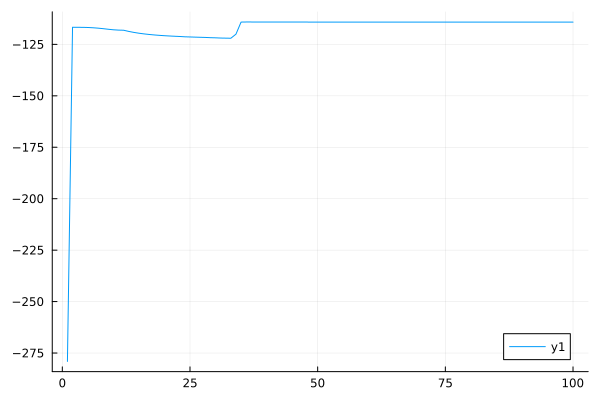

In [12]:
plot(mls)

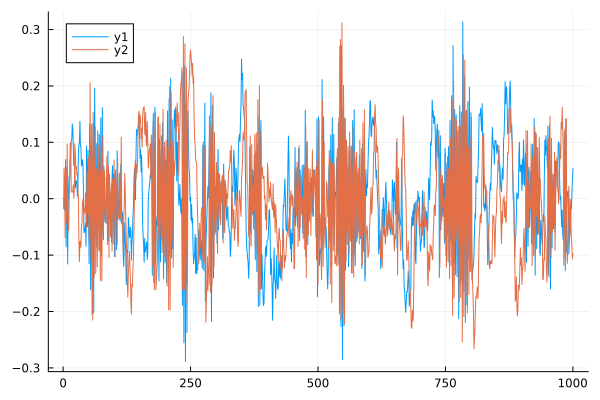

In [13]:
plot(x')


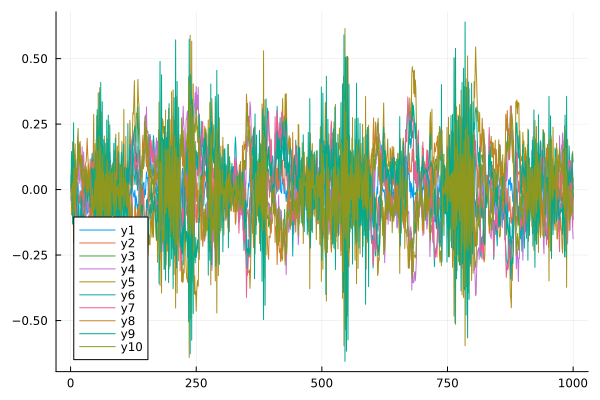

In [14]:
plot(y')

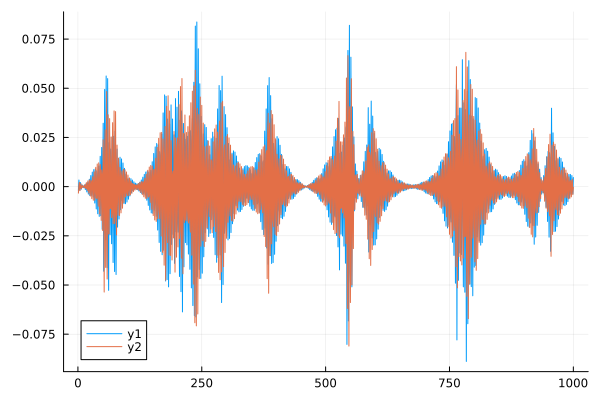

In [15]:
plot(FS[1].x_smooth')

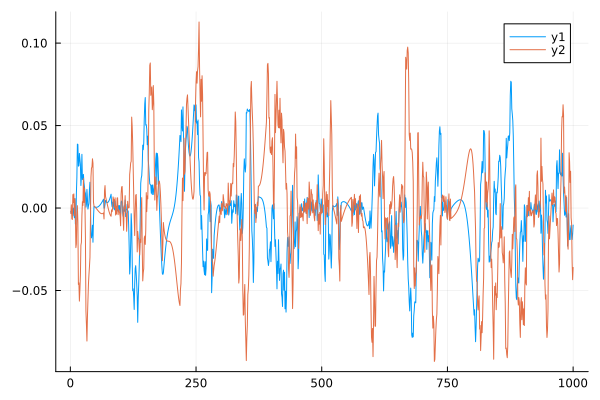

In [16]:
plot(FS[2].x_smooth')

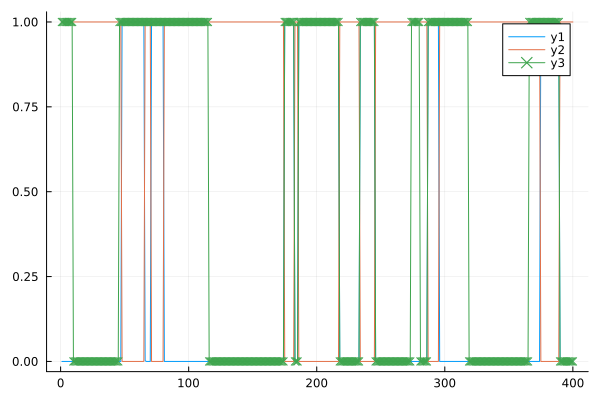

In [17]:
plot(exp.(FB.γ[:,1:400])')
plot!(z[1:400] .- 1, marker=:x)

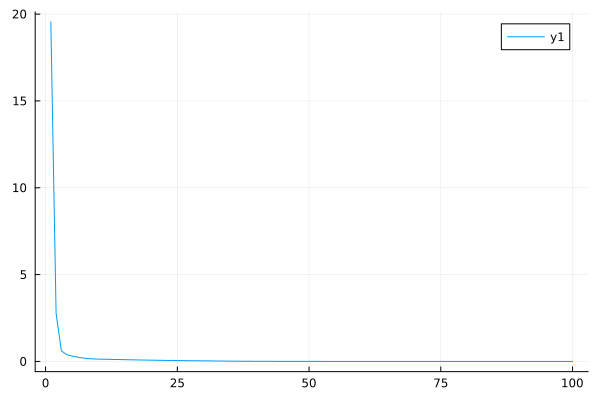

In [18]:
plot(param_diff)

In [19]:
y1 = model.B[1].obs_model.C * FS[1].x_smooth
y2 = model.B[2].obs_model.C * FS[2].x_smooth

10×1000 Matrix{Float64}:
 -0.00260047    0.00250455  …  -0.0258199  -0.0364613  -0.0308127
  0.00114778   -0.00325894      0.0115658   0.021016    0.0189818
  0.0041461     0.00143875      0.0407386   0.0457152   0.0355517
 -0.00113874    0.0029436      -0.0114519  -0.0201883  -0.0181083
  0.00356766   -0.00755989      0.0357478   0.0594494   0.0525787
 -0.00284511    0.00192066  …  -0.0281844  -0.038018   -0.0316634
  0.000784995  -0.00248369      0.0079302   0.0149558   0.0136189
  0.00216929   -0.0044495       0.0217245   0.0358111   0.0316021
 -0.00322221    0.00836751     -0.0324076  -0.0572126  -0.0513352
  0.00359967    0.00255675      0.0352665   0.036701    0.0275984

In [20]:
y_combined = y1 .+ y2

10×1000 Matrix{Float64}:
 -0.00341431    0.00169522   -0.00419514   …  -0.0370727  -0.0324059
  0.00306249   -0.00453075    0.00243486       0.0237772   0.0176672
  0.000839823   0.00447643    0.00750595       0.0405967   0.0391633
 -0.00684762    0.00537363   -0.000183915     -0.0278538  -0.01636
  0.0107481    -0.0114008     0.00578706       0.0694175   0.0491291
 -0.00122367   -0.00279519   -0.00350896   …  -0.0341642  -0.0385776
  0.00411233   -0.00797819    0.00356641       0.0211221   0.00609851
 -0.000890218   0.000259636   0.00413603       0.0302841   0.0379702
  0.00158087    0.00504269   -0.00956371      -0.0502301  -0.0548473
 -0.00123328    0.00593189    0.00715466       0.0296627   0.0311795

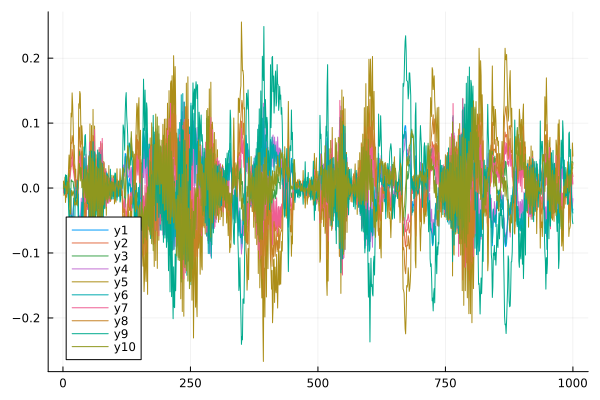

In [21]:
plot(y_combined')